In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import mplfinance as mpf
from tqdm import tqdm

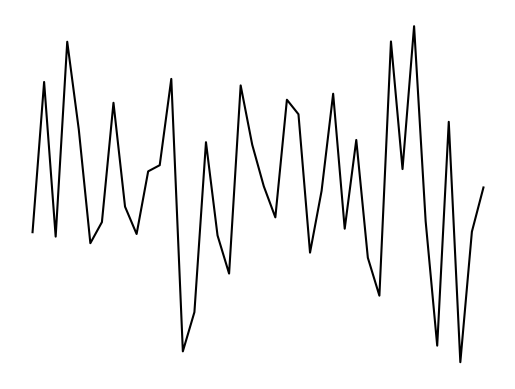

In [105]:
random_data = np.random.randn(40)
plt.axis('off')
plt.plot(range(40), random_data, color = '0')

In [ ]:
# df = pd.read_csv("/Users/ohno/study/create_image/price.csv", index_col='Date', parse_dates=True)
df = pd.read_csv("./price.csv", index_col='Date', parse_dates=True)

df[70:100]

,Unnamed: 0,Open,High,Low,Close,MACD,Signal,RSI,SMA5,SMA25,Label
Date,,,,,,,,,,,
2001-06-14,70,12826.18,12935.07,12804.03,12846.66,-224.248830,-153.210528,22.138571,13033.382,13563.7484,1
2001-06-15,71,12722.38,12797.87,12578.78,12790.38,-239.540641,-170.050310,21.767402,12905.414,13513.6068,0
2001-06-18,72,12766.38,12787.23,12656.58,12697.79,-256.176248,-185.596773,18.975956,12799.676,13466.5976,0
2001-06-19,73,12734.13,12912.92,12511.66,12574.26,-276.142940,-200.984082,20.864901,12746.508,13407.4068,0
2001-06-20,74,12575.35,12762.09,12512.13,12674.64,-280.633042,-216.091502,29.691799,12716.746,13366.6216,1
2001-06-21,75,12776.76,13005.46,12727.55,12962.43,-257.998442,-229.610160,41.366245,12739.900,13328.6920,1
2001-06-22,76,13041.89,13079.11,12940.58,13044.61,-230.769798,-239.196310,42.417961,12790.746,13295.3656,1
2001-06-25,77,13052.96,13073.49,12823.45,12896.47,-218.622921,-243.481227,41.994830,12830.482,13244.1512,0
2001-06-26,78,12856.15,13026.80,12837.80,12978.82,-200.046194,-242.686562,44.726676,12911.394,13199.6564,1


In [ ]:
# df1 = pd.read_csv("/Users/ohno/study/create_image/price.csv")
df1 = pd.read_csv("./price.csv")

span = 60
datename = df.index.strftime('%Y-%m-%d')
print(f'{str(datename[0])}~{str(datename[span+30-1])}')
df1.loc[span+30]

2001-03-02~2001-07-11


Unnamed: 0            90
Date           2001/7/12
Open            12133.05
High            12407.95
Low             12133.05
Close           12407.95
MACD         -259.396047
Signal       -213.996988
RSI            36.949945
SMA5           12251.846
SMA25         12733.1344
Label                  1
Name: 90, dtype: object

In [60]:
import shutil
import os

dir_path = "tmp"
files = os.listdir(dir_path)

span = 60
datename = df.index.strftime('%Y-%m-%d')

for i in range(4475-span-30):
    foldername = f'{str(datename[i])}~{str(datename[i+span+30-1])}/'
    for k in range(0, 31, 1):
        dirname = f'stride/60day/1stride/{foldername}/'
        if not(os.path.exists(dirname)):
            os.makedirs(dirname)
        new_path = shutil.copy(f'tmp/{files[i+k]}', dirname+files[i+k])

In [61]:
# def macd(df):
#     FastEMA_period = 12  # 短期EMAの期間
#     SlowEMA_period = 26  # 長期EMAの期間
#     SignalSMA_period = 9  # SMAを取る期間
#     df["MACD"] = df["Close"].ewm(span=FastEMA_period).mean() - df["Close"].ewm(span=SlowEMA_period).mean()
#     df["Signal"] = df["MACD"].rolling(SignalSMA_period).mean()
#     return df

# def rsi(df):
#     # 前日との差分を計算
#     df_diff = df["Close"].diff(1)
 
#     # 計算用のDataFrameを定義
#     df_up, df_down = df_diff.copy(), df_diff.copy()
    
#     # df_upはマイナス値を0に変換
#     # df_downはプラス値を0に変換して正負反転
#     df_up[df_up < 0] = 0
#     df_down[df_down > 0] = 0
#     df_down = df_down * -1
    
#     # 期間14でそれぞれの平均を算出
#     df_up_sma14 = df_up.rolling(window=14, center=False).mean()
#     df_down_sma14 = df_down.rolling(window=14, center=False).mean()
 
#     # RSIを算出
#     df["RSI"] = 100.0 * (df_up_sma14 / (df_up_sma14 + df_down_sma14))
 
#     return df

In [62]:
# import datetime as dt

# def make_dataset(file_path_list):
#     for file_path in file_path_list:
#         df = pd.read_csv(file_path)
#         df['Date'] = df['Date'].str.cat(df['Time'], sep='/')
#         df.index = pd.DatetimeIndex(df['Date'])
#         df = df.drop(columns=['Date', 'Time'])
#         if dataset == None:
#             #concatする！


# df = pd.read_csv("nikkei225-5min-2021.csv")
# df['Date'] = df['Date'].str.cat(df['Time'], sep='/')
# df.index = pd.DatetimeIndex(df['Date'])
# df = df.drop(columns=['Date', 'Time'])
# # df = macd(df)
# # df = rsi(df)
# # df["SMA5"] = df["Close"].rolling(window=5).mean()
# # df["SMA25"] = df["Close"].rolling(window=25).mean()
# # df = df.dropna()
# # df = df[df.index >= dt.datetime(2021, 1, 5)]
# df

In [63]:
# span = 42
# dirname = '/Users/ohno/study/images/candle/'
# for i in tqdm(range(1)):
#     add_plot = [
#         mpf.make_addplot(df["SMA5"][i:i+span], panel=0, color="orange", width=0.8),
#         mpf.make_addplot(df["SMA25"][i:i+span], panel=0, color="blue", width=0.8),
#         mpf.make_addplot(df["MACD"][i:i+span], panel=1, color="green", width=0.8),
#         mpf.make_addplot(df["Signal"][i:i+span], panel=1, color="magenta", width=0.8),
#         mpf.make_addplot(df["RSI"][i:i+span], panel=2, color="red", width=0.8),
#     ]
#     mpf.plot(df[i:i+60], type="candle", style="classic", figsize=(4,4), tight_layout=True, axisoff=True, addplot=add_plot)